<a href="https://colab.research.google.com/github/ilyes-frag/news-classification-using-clustering/blob/main/using_K_means_algorithme_for_news_classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NEWS CLASSIFICATION

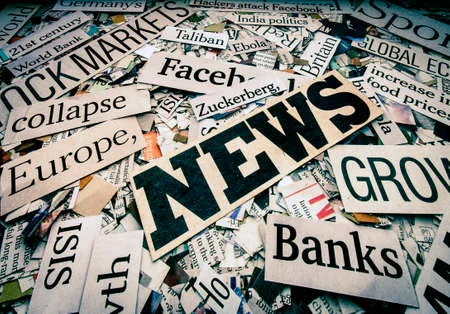

**Task:use unsupervised learning to classify the news with K-means algorithme**

**Input Data :**

1- for the dataset im using a dataset contains around 210k news headlines from 2012 to 2022 from HuffPost. This is one of the biggest news datasets and can serve as a benchmark for a variety of computational linguistic tasks. HuffPost stopped maintaining an extensive archive of news articles sometime after this dataset was first collected in 2018, so it is not possible to collect such a dataset in the present day. Due to changes in the website, there are about 200k headlines between 2012 and May 2018 and 10k headlines between May 2018 and 2022.

**Goal :**

The goal of this research is to drop the category column in the dataset and try  to classify each article to the exact class and i will compare after between the real class and the predicted ones.

**Evaluation Metric :**
I will Calculate the deference between the predicted class and the real class.


**Tasks :**

**1-Exploratory Data Analysis:**

-Study the data structure.

**2-Data Preprocessing:**

-Vectorize my dataset or my text.

**3-Build Model:**

for the Model we will use k-means Clustering:
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

**4-Calculate the error:**

to Calculte error i will just substract the true values from the predicted one's






#***1-Exploratory Data Analysis***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
%autosave 10



Autosaving every 10 seconds


In [3]:
!ls

drive  sample_data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
 drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
# Constants

path="/content/drive/MyDrive/News_Category_Dataset_v3.json.zip"

In [7]:
# read the dataset
train=pd.read_json(path, lines=True)
train.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [8]:
train.short_description[30]

'U.S. President Joe Biden, in London for the funeral of Queen Elizabeth II, says his heart went out to the royal family, adding the queen’s death left a “giant hole.”.'

In [9]:
train.describe()

<ipython-input-9-39c93376966e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe()


,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,3890
top,https://www.huffingtonpost.comhttps://www.wash...,Sunday Roundup,POLITICS,,,2014-03-25 00:00:00
freq,2,90,35602,19712,37418,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


we can see in the description above that the news article are taken from 01-2012 to 09-2022..... 10 years of data.woow interesting

<Axes: xlabel='count', ylabel='category'>

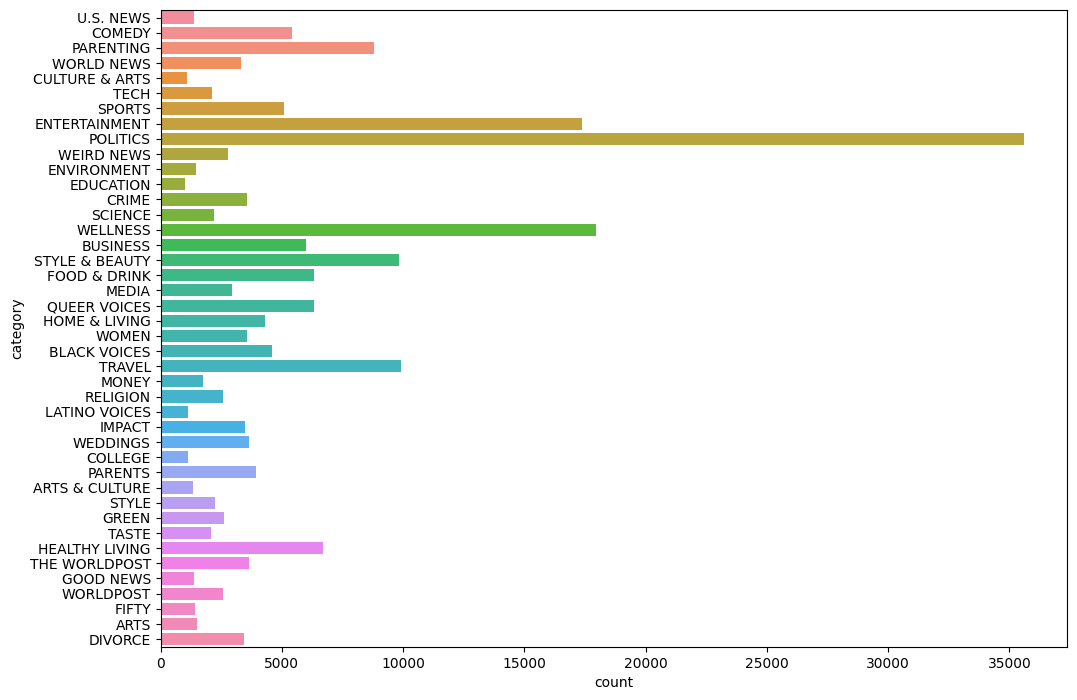

In [10]:
#lets' plot count of each category
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(y='category', data = train,saturation=0.9)


the objective of this notebook is to class each article with his specific category so i will drop the category column and i will compare after my results with this category column

In [11]:
train['category'].nunique()

42

In [12]:
# store the category column
category=train.category
#drop the categorycolumn from our dataset
#train=train.drop(columns='category')
#category

#***2-Pre-Processing***

In [13]:
texts=train['short_description']

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

In [15]:
X.shape

(209527, 75420)

In [16]:
train['short_description'].shape

(209527,)

#***3-Build Our Model***

we will use k-means algorithme to predict out classes.

In [17]:
K=42

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =K ,init='k-means++', max_iter=1000,n_init=1)
model.fit(X)

KMeans(max_iter=1000, n_clusters=42, n_init=1)

In [19]:
train['cluster']=model.labels_

In [20]:
train.head()

,link,headline,category,short_description,authors,date,cluster
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,10
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,10
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,10
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,10
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,10


In [21]:
train['cluster'].value_counts()

10    191047
34      5620
16      2664
36      2378
1       1378
33      1202
18      1176
20       879
29       790
25       477
30       424
27       363
14       285
32       264
28       194
19       148
40       142
23        67
26         3
11         2
41         2
24         2
39         1
38         1
9          1
17         1
12         1
6          1
13         1
8          1
15         1
3          1
2          1
0          1
7          1
37         1
5          1
4          1
31         1
21         1
22         1
35         1
Name: cluster, dtype: int64

Like we see the class 10 it seems like politics class in the original category

In [22]:
clusters = train.groupby('cluster')

for cluster in clusters.groups:
  # create csv file
    f = open('cluster'+str(cluster)+ '.csv', 'w')
    # get title and overview columns
    data = clusters.get_group(cluster)[['category','short_description']]
    # set index to id
    f.write(data.to_csv(index_label='id'))
    f.close()

In [23]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(K):
    print("Cluster %d:" % i)
    #print out 10 feature terms of each cluster
    for j in order_centroids[i, :10]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 tasty
 feast
 sides
 covered
 thanksgiving
 round
 easy
 got
 ve
 make
------------
Cluster 1:
 far
 away
 people
 right
 time
 ve
 just
 come
 like
 year
------------
Cluster 2:
 president
 rise
 challenge
 welcome
 families
 thundered
 million
 obama
 shutdowns
 belated
------------
Cluster 3:
 asking
 question
 govern
 resounding
 echoed
 mounting
 basic
 2015
 evidence
 democrats
------------
Cluster 4:
 disrupt
 vowed
 initially
 marathon
 st
 raise
 paul
 awareness
 color
 issues
------------
Cluster 5:
 standards
 adhere
 objective
 applied
 reminds
 demand
 terms
 rules
 12
 son
------------
Cluster 6:
 harlem
 spanish
 elementary
 visited
 neighborhood
 lived
 students
 early
 york
 school
------------
Cluster 7:
 voting
 evils
 lesser
 neighborhoods
 representatives
 directly
 democracy
 citizens
 meant
 technology
------------
Cluster 8:
 al
 jarba
 ilah
 brig
 bashir
 abdul
 delegation
 ahmed
 gen
 coalition
------------
Cluster 9:
 somers
 

### ***4-Calculate the error***

In [24]:
train

,link,headline,category,short_description,authors,date,cluster
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,10
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,10
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,10
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,10
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,10
...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,10
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,10
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,10
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,10


In [25]:
categ=pd.DataFrame(train['category'].value_counts())
categ

,category
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340
BUSINESS,5992


In [26]:
clust=pd.DataFrame(train['cluster'].value_counts(dropna=True))
categ=pd.DataFrame(train['category'].value_counts(dropna=True))

In [27]:
dff=clust.reset_index(drop=False).merge(categ.reset_index(drop=False), left_index=True, right_index=True)


In [28]:
#dff.set_index(['index_x'])
dff = dff.rename(columns={'index_x': 'cluster', 'cluster': 'num_clust', 'index_y': 'category', 'category': 'num_categ'})


In [29]:
dff

,cluster,num_clust,category,num_categ
0,10,191047,POLITICS,35602
1,34,5620,WELLNESS,17945
2,16,2664,ENTERTAINMENT,17362
3,36,2378,TRAVEL,9900
4,1,1378,STYLE & BEAUTY,9814
5,33,1202,PARENTING,8791
6,18,1176,HEALTHY LIVING,6694
7,20,879,QUEER VOICES,6347
8,29,790,FOOD & DRINK,6340
9,25,477,BUSINESS,5992


In [30]:
dff['pct_change'] = dff[['num_clust', 'num_categ']].pct_change(axis=1)['num_categ']


In [31]:
dff

,cluster,num_clust,category,num_categ,pct_change
0,10,191047,POLITICS,35602,-0.813648
1,34,5620,WELLNESS,17945,2.193060
2,16,2664,ENTERTAINMENT,17362,5.517267
3,36,2378,TRAVEL,9900,3.163162
4,1,1378,STYLE & BEAUTY,9814,6.121916
5,33,1202,PARENTING,8791,6.313644
6,18,1176,HEALTHY LIVING,6694,4.692177
7,20,879,QUEER VOICES,6347,6.220705
8,29,790,FOOD & DRINK,6340,7.025316
9,25,477,BUSINESS,5992,11.561845


In [40]:
dff['error']=dff.num_categ-dff.num_clust

In [41]:
dff

,cluster,num_clust,category,num_categ,pct_change,error
0,10,191047,POLITICS,35602,-0.813648,-155445
1,34,5620,WELLNESS,17945,2.193060,12325
2,16,2664,ENTERTAINMENT,17362,5.517267,14698
3,36,2378,TRAVEL,9900,3.163162,7522
4,1,1378,STYLE & BEAUTY,9814,6.121916,8436
5,33,1202,PARENTING,8791,6.313644,7589
6,18,1176,HEALTHY LIVING,6694,4.692177,5518
7,20,879,QUEER VOICES,6347,6.220705,5468
8,29,790,FOOD & DRINK,6340,7.025316,5550
9,25,477,BUSINESS,5992,11.561845,5515


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dff, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dff, *['num_clust'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dff, *['num_categ'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dff, *['pct_change'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dff, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dff, *['num_clust'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dff, *['num_categ'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dff, *['pct_change'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dff, *[[['cluster', 'num_clust'], ['num_clust', 'num_categ'], ['num_categ', 'pct_change'], ['pct_change', 'error']]], **{})
chart

The outcome was less than satisfactory due to the multitude of classes, yet we can enhance our model in the future.